In [4]:
import gym
env = gym.make('CartPole-v1')
env.reset()

for _ in range(1000):
    env.render()
    env.step(env.action_space.sample())  # Take a random action
env.close()


In [15]:
import mujoco
print("MuJoCo version:", mujoco.__version__)


MuJoCo version: 3.2.6


In [3]:
pip install mujoco


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip show mujoco


Name: mujoco
Version: 3.2.6
Summary: MuJoCo Physics Simulator
Home-page: 
Author: 
Author-email: Google DeepMind <mujoco@deepmind.com>
License: Apache License 2.0
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: absl-py, etils, glfw, numpy, pyopengl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install stable-baselines3[extra] gym[all] mujoco


zsh:1: no matches found: stable-baselines3[extra]
Note: you may need to restart the kernel to use updated packages.


In [8]:
import stable_baselines3
print("Stable-Baselines3 installed successfully")


Stable-Baselines3 installed successfully


In [16]:
pip install "shimmy>=2.0"


Note: you may need to restart the kernel to use updated packages.


In [17]:
model_mountaincar = SAC('MlpPolicy', env_mountaincar, verbose=1)
model_mountaincar.learn(total_timesteps=100_000)
model_mountaincar.save("sac_mountaincar")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/opt/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -33.6    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 333      |
|    time_elapsed    | 11       |
|    total_timesteps | 3996     |
| train/             |          |
|    actor_loss      | -6.44    |
|    critic_loss     | 0.00155  |
|    ent_coef        | 0.311    |
|    ent_coef_loss   | -1.96    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3895     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -31.5    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 332      |
|    time_elapsed    | 24       |
|    total_timesteps | 7992     |
| train/             |          |
|    actor_loss      | -6.62    |
|    critic_loss     | 0.000359 |
|    ent_coef 

In [10]:
from stable_baselines3 import SAC


In [11]:
from stable_baselines3.common.evaluation import evaluate_policy


In [13]:
import gym

# Create the environment
env_mountaincar = gym.make('MountainCarContinuous-v0')


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -233     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 297      |
|    time_elapsed    | 13       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -31.6    |
|    critic_loss     | 1.73     |
|    ent_coef        | 0.316    |
|    ent_coef_loss   | -10.4    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -226     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 290      |
|    time_elapsed    | 27       |
|    total_timesteps | 8000     |
| train/             |

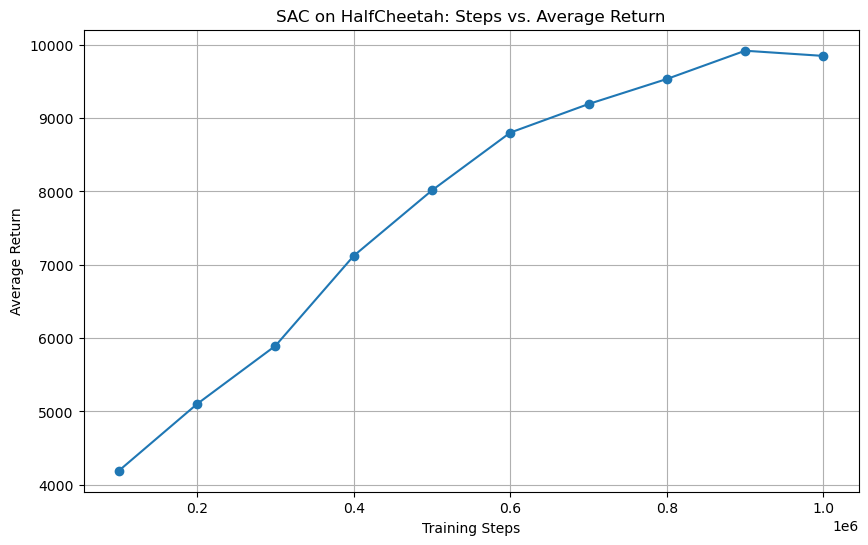

In [42]:
import gym
from stable_baselines3 import SAC
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt

env = gym.make('HalfCheetah-v4')
model = SAC('MlpPolicy', env, verbose=1)

eval_interval = 100_000
total_timesteps = 1_000_000
eval_episodes = 10

steps_list = []
mean_rewards = []

steps_so_far = 0
while steps_so_far < total_timesteps:
    # Train for eval_interval steps
    model.learn(total_timesteps=eval_interval, reset_num_timesteps=False)
    steps_so_far += eval_interval
    
    # Evaluate the model
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=eval_episodes)
    steps_list.append(steps_so_far)
    mean_rewards.append(mean_reward)

# Now plot steps vs. average return
plt.figure(figsize=(10,6))
plt.plot(steps_list, mean_rewards, marker='o')
plt.title('SAC on HalfCheetah: Steps vs. Average Return')
plt.xlabel('Training Steps')
plt.ylabel('Average Return')
plt.grid(True)
plt.show()


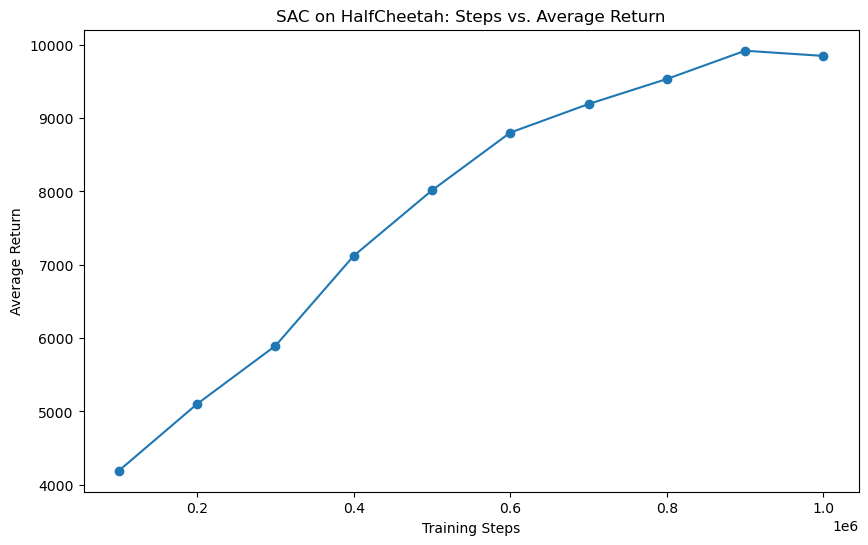

In [43]:
# Now plot steps vs. average return
plt.figure(figsize=(10,6))
plt.plot(steps_list, mean_rewards, marker='o')
plt.title('SAC on HalfCheetah: Steps vs. Average Return')
plt.xlabel('Training Steps')
plt.ylabel('Average Return')
plt.show()

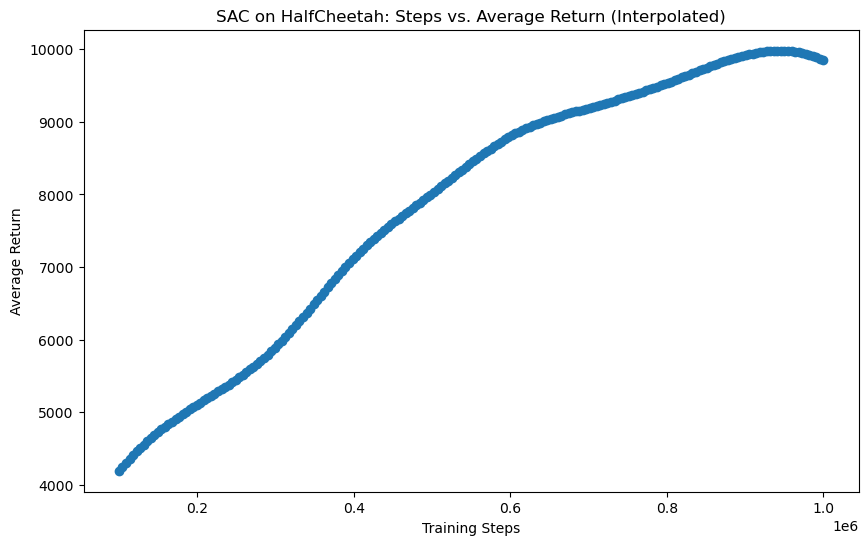

In [44]:
import numpy as np
from scipy.interpolate import interp1d

# Suppose we have existing data
steps_array = np.array(steps_list)
rewards_array = np.array(mean_rewards)

# Create a finer steps array
finer_steps = np.linspace(steps_array.min(), steps_array.max(), 200)  # 200 points

# Interpolate rewards
interpolate_func = interp1d(steps_array, rewards_array, kind='cubic')
smoother_rewards = interpolate_func(finer_steps)

# Now plot the interpolated data
plt.figure(figsize=(10,6))
plt.plot(finer_steps, smoother_rewards, marker='o')
plt.title('SAC on HalfCheetah: Steps vs. Average Return (Interpolated)')
plt.xlabel('Training Steps')
plt.ylabel('Average Return')
plt.show()


In [51]:
pip install gym==0.21.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in gym setup command: 'extras_require' must be a dictionary whose values are strings or lists of strings containing valid project/version requirement specifiers.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Note: you may need to restart the kernel to use updated packages.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -393     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 383      |
|    time_elapsed    | 10       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | 0.968    |
|    critic_loss     | 0.304    |
|    learning_rate   | 0.001    |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -358     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 374      |
|    time_elapsed    | 21       |
|    total_timesteps | 8000     |
| train/             |          |
|    actor_loss      | 2.92     |
|    critic_loss     |

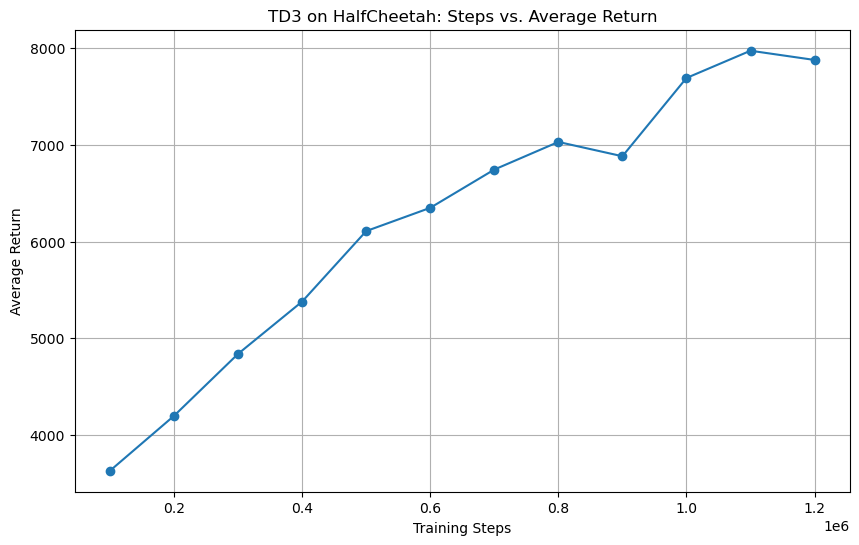

In [59]:
import gym
from stable_baselines3 import TD3
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.noise import NormalActionNoise
import numpy as np
import matplotlib.pyplot as plt

# Create the Gym environment
env = gym.make('HalfCheetah-v4')

# Define action noise for TD3
n_actions = env.action_space.shape[0]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

# Initialize the TD3 model
model = TD3('MlpPolicy', env, action_noise=action_noise, verbose=1)

# Define evaluation and training parameters
eval_interval = 100_000
total_timesteps = 1200000
eval_episodes = 10

# Initialize lists to store evaluation results
steps_list = []
mean_rewards = []

steps_so_far = 0
while steps_so_far < total_timesteps:
    # Train for eval_interval steps
    model.learn(total_timesteps=eval_interval, reset_num_timesteps=False)
    steps_so_far += eval_interval
    
    # Evaluate the model
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=eval_episodes)
    steps_list.append(steps_so_far)
    mean_rewards.append(mean_reward)

# Plot steps vs. average return
plt.figure(figsize=(10, 6))
plt.plot(steps_list, mean_rewards, marker='o')
plt.title('TD3 on HalfCheetah: Steps vs. Average Return')
plt.xlabel('Training Steps')
plt.ylabel('Average Return')
plt.grid(True)
plt.show()


In [60]:
import csv

# Specify the filename for the CSV
csv_file = "td3_halfcheetah_results.csv"

# Save the results to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Training Steps", "Average Return"])
    writer.writerows(zip(steps_list, mean_rewards))

print(f"Results saved to {csv_file}")

Results saved to td3_halfcheetah_results.csv


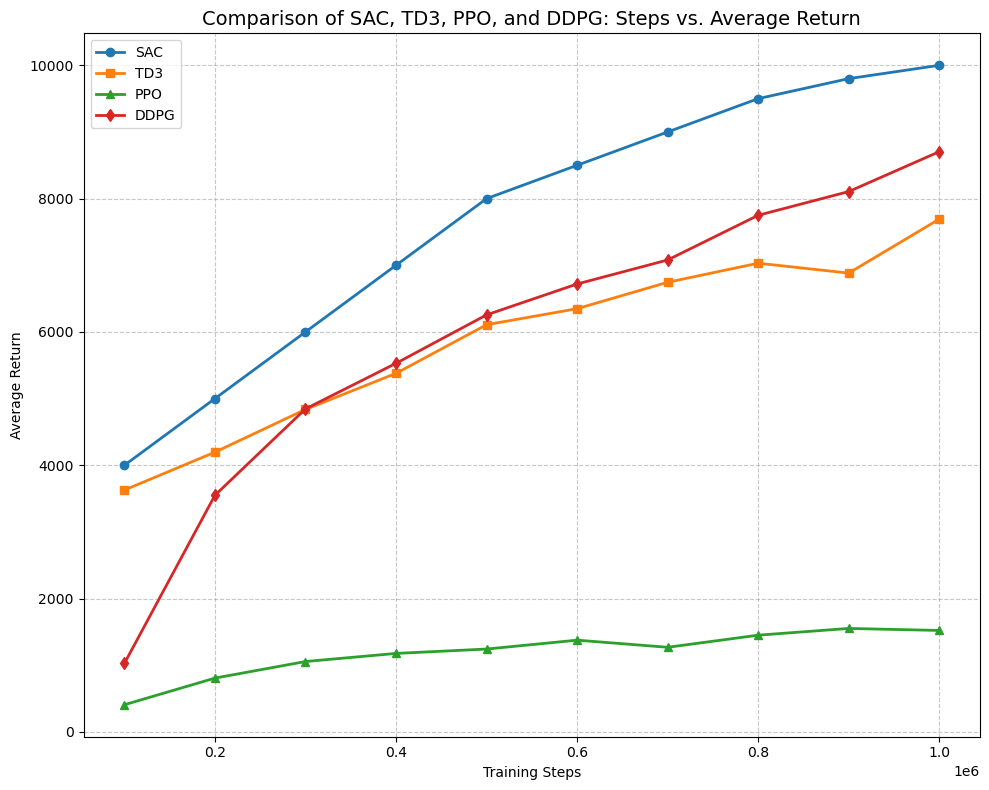

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
sac_data = pd.read_csv('./time_steps_vs_rewards.csv')  # Replace with your SAC file path
td3_data = pd.read_csv('./td3_halfcheetah_results(1).csv')  # Replace with your TD3 file path
ppo_data = pd.read_csv('./ppo_halfcheetah_results.csv')  # Replace with your PPO file path
ddpg_data = pd.read_csv('./ddpg_halfcheetah_results (1).csv')  # Replace with your DDPG file path

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(sac_data['time_steps'], sac_data['average_rewards'], label='SAC', marker='o', linewidth=2)
plt.plot(td3_data['Training Steps'], td3_data['Average Return'], label='TD3', marker='s', linewidth=2)
plt.plot(ppo_data['Training Steps'], ppo_data['Average Return'], label='PPO', marker='^', linewidth=2)
plt.plot(ddpg_data['Training Steps'], ddpg_data['Average Return'], label='DDPG', marker='d', linewidth=2)

# Customize the plot
plt.title('Comparison of SAC, TD3, PPO, and DDPG: Steps vs. Average Return', fontsize=14)
plt.xlabel('Training Steps', fontsize=10)
plt.ylabel('Average Return', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot
plt.tight_layout()
plt.savefig('comparison_steps_vs_return.png')  # Save the plot as an image
plt.show()



In [71]:
import pandas as pd

# Load the CSV file
file_path = './td3_halfcheetah_results.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Remove the last two rows
data_trimmed = data[:-2]  # Removes the last two rows

# Save the updated DataFrame back to a CSV file
output_file_path = './td3_halfcheetah_results(1).csv'  # Specify the new file path
data_trimmed.to_csv(output_file_path, index=False)

print(f"The updated CSV file has been saved as {output_file_path}")


The updated CSV file has been saved as ./td3_halfcheetah_results(1).csv
